# **Car Price Prediction**

## **Import dependencies**

In [1]:
import numpy as np
import pandas as pd

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression

## **Loading Data**

In [17]:
df = pd.read_csv('data/car/car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [20]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [21]:
df.shape

(301, 9)

In [22]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [25]:
df.Selling_Price.nunique()

156

In [26]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [29]:
df.select_dtypes(include='object').head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [30]:
df.Car_Name.value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [31]:
df.Fuel_Type.value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [32]:
df.Seller_Type.value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [33]:
df.Transmission.value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

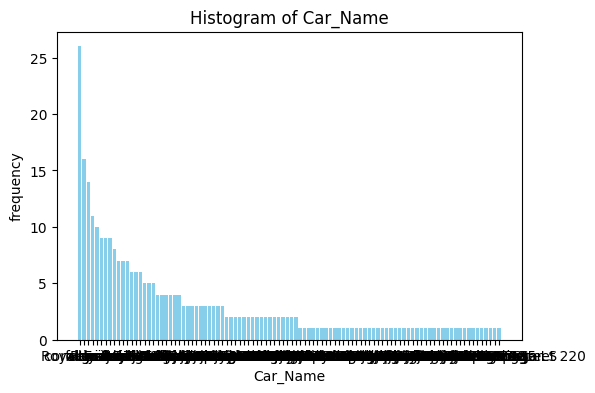

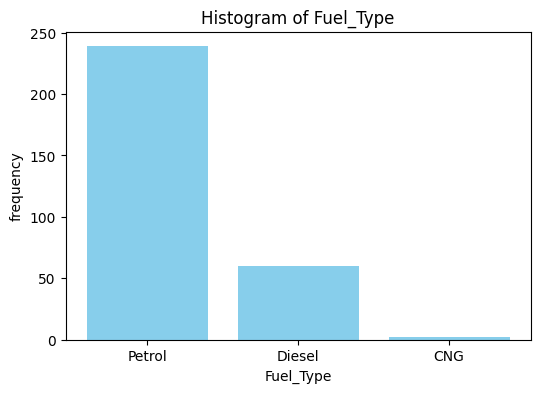

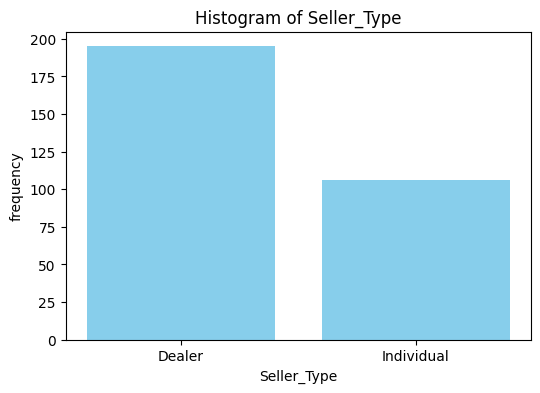

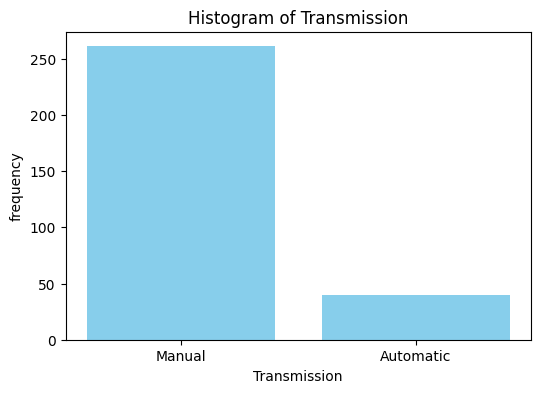

In [39]:
for col in df.select_dtypes(include='object').columns:
    value_counts = df[col].value_counts()

    plt.figure(figsize=(6,4))
    plt.bar(value_counts.index,value_counts.values,color='skyblue')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

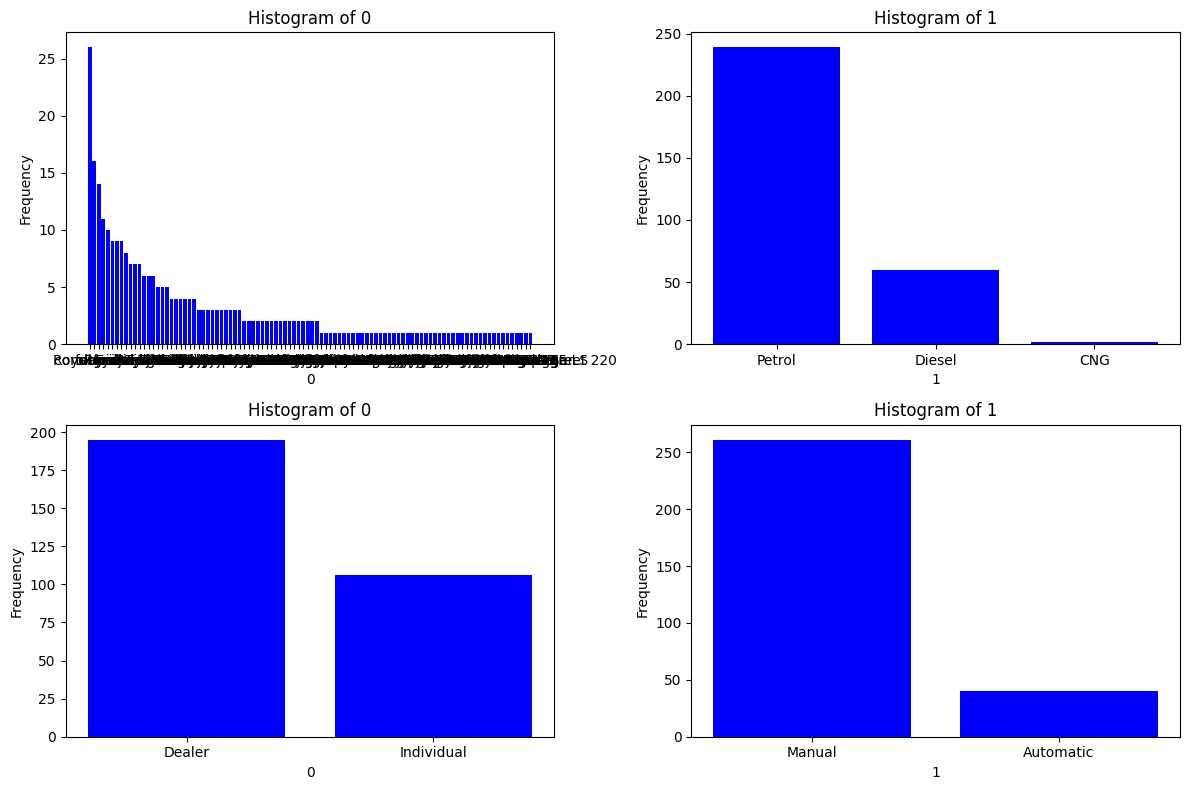

In [44]:
num_cols = 2
num_rows = (len(df.select_dtypes(include='object').columns)+num_cols-1)//num_cols

fig,axes=plt.subplots(num_rows,num_cols,figsize=(12,8))
i=0
for col in df.select_dtypes(include='object').columns:
    value_counts = df[col].value_counts()

    row = i//num_cols
    col=i%num_cols

    axes[row,col].bar(value_counts.index,value_counts.values,color='Blue')
    axes[row,col].set_xlabel(col)
    axes[row,col].set_ylabel('Frequency')
    axes[row,col].set_title(f'Histogram of {col}')
    i+=1

plt.tight_layout()
plt.show()

In [45]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [46]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
le = LabelEncoder()
df_copy=df.copy()
column_class_mapping = {}
for col in ['Fuel_Type','Seller_Type','Transmission']:
    df_copy[col]=le.fit_transform(df_copy[col])
    column_class_mapping[col]=le.classes_
    
column_class_mapping

{'Fuel_Type': array(['CNG', 'Diesel', 'Petrol'], dtype=object),
 'Seller_Type': array(['Dealer', 'Individual'], dtype=object),
 'Transmission': array(['Automatic', 'Manual'], dtype=object)}

In [54]:
df_copy.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


Splitting the data into training and test data

In [55]:
X = df_copy.drop(['Car_Name','Selling_Price'],axis=1)
y = df_copy['Selling_Price'].copy()
X.shape,y.shape

((301, 7), (301,))

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                 train_size=0.8,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 7), (61, 7), (240,), (61,))

In [59]:
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred_trainlr=lin_reg.predict(X_train)
msetrainlr= mean_squared_error(y_train,y_pred_trainlr)

y_pred_testlr=lin_reg.predict(X_test)
msetestlr=mean_squared_error(y_test,y_pred_testlr)

print(f'RMSE Train: {np.sqrt(msetrainlr)}')
print(f'RMSE Test: {np.sqrt(msetestlr)}')

RMSE Train: 1.751355054316165
RMSE Test: 1.878543918543866


In [67]:
input_data = X.loc[10]

In [68]:
input_data_df = pd.DataFrame([input_data.values],columns=X.columns)
input_data_df

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2017.0,3.6,2135.0,2.0,0.0,1.0,0.0


In [69]:
label=y.loc[10]
lin_reg.predict(input_data_df),label

(array([4.31511433]), 2.85)

In [70]:
log_reg = LogisticRegression(random_state=42)

In [72]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.1)
ls.fit(X_train,y_train)
ypredtrainls = ls.predict(X_train)
msetrainls = mean_squared_error(y_train,ypredtrainls)
rmsetrainls = np.sqrt(msetrainls)

ypredtestls = ls.predict(X_test)
msetestls = mean_squared_error(y_test,ypredtestls)
rmsetestls = np.sqrt(msetestls)

print(f'RMSE train Lasso: {rmsetrainls}')
print(f'RMSE test Lasso: {rmsetestls}')
print(f'RMSE Train Linear Regression: {np.sqrt(msetrainlr)}')
print(f'RMSE Test Linear Regression: {np.sqrt(msetestlr)}')

RMSE train Lasso: 1.835140988551745
RMSE test Lasso: 1.8909520511523823
RMSE Train Linear Regression: 1.751355054316165
RMSE Test Linear Regression: 1.878543918543866


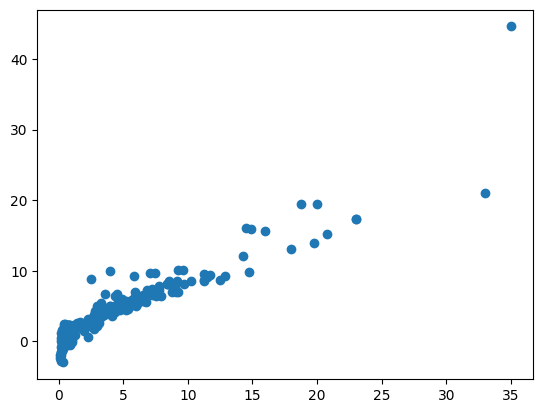

In [73]:
plt.scatter(y_train,ypredtrainls)